In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

#Trendline graph

##A linear graph (Linear Regression)

###Linear function: $f(x)=ax+b$


ex: $f(x)=2x+3$

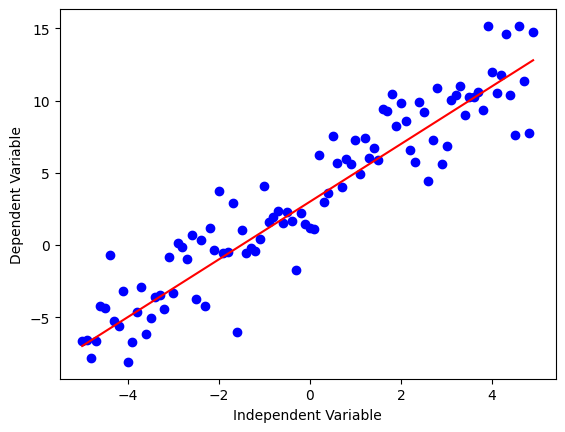

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3
y_noise = 2*np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

##A curved graph (Non-Linear Regression)

###Polynomial Functions with k degrees (maximum power of x)
A cubic function : $f(x) = ax^3 + bx^2 + cx + d$ => ex: $f(x) = ax^3 + bx^2 + cx + 3$

A quadratic function: $f(x) = ax^2 + bx + c$ => ex: $f(x)= ax^2 + c$

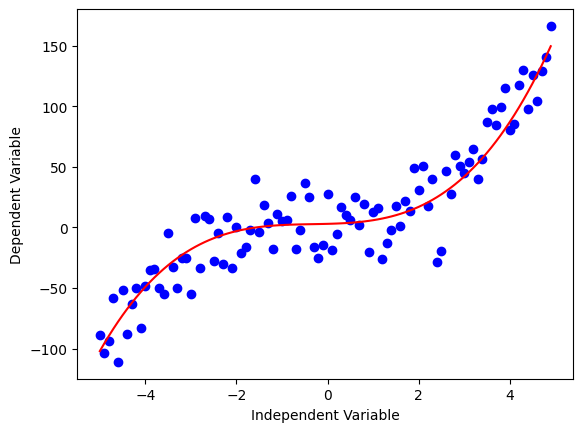

In [3]:
#A cubic function
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

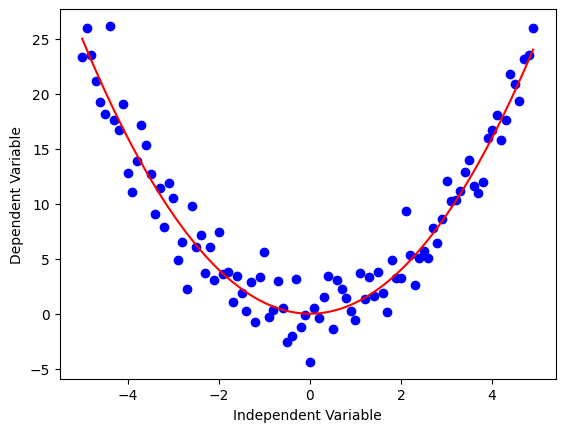

In [4]:
#A quadratic function
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

###An exponential function with base c: $Y = a + b c^X$

ex: $f(x) = e^x$
where b ≠0, c > 0 , c ≠1 (constant), and x (a variable) is any real number.

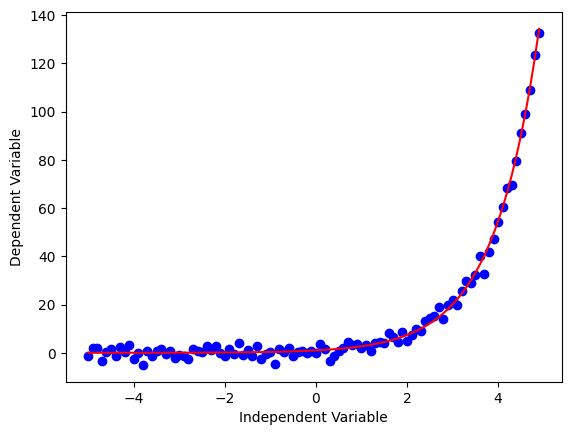

In [5]:
X = np.arange(-5.0, 5.0, 0.1)
Y= np.exp(X)
y_noise = 2 * np.random.normal(size=X.size)
y_data = Y + y_noise
plt.plot(X,y_data,'bo')
plt.plot(X,Y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

###Logarithmic function: $y = \log_b(x)$


ex: $y = \log(x)$

<ipython-input-6-78b16b28e18b>:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


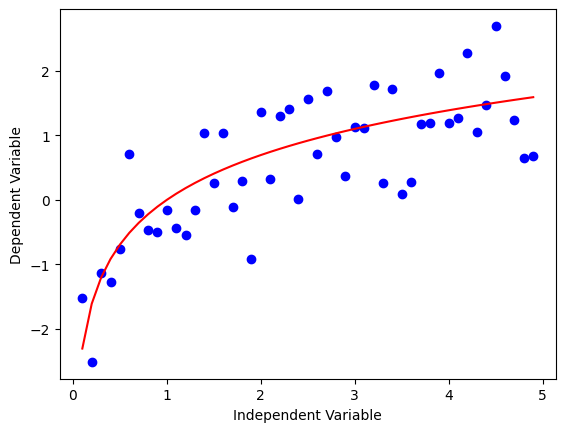

In [6]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)
y_noise = 0.5*np.random.normal(size=X.size)
y_data = Y + y_noise
plt.plot(X,y_data, 'bo')
plt.plot(X,Y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Sigmoidal/Logistic function: $f(x) = a + \frac{b}{1+ c^{(x-d)}}$

$f(x) = 1 - \frac{4}{1+ 3^{(x-2)}}$

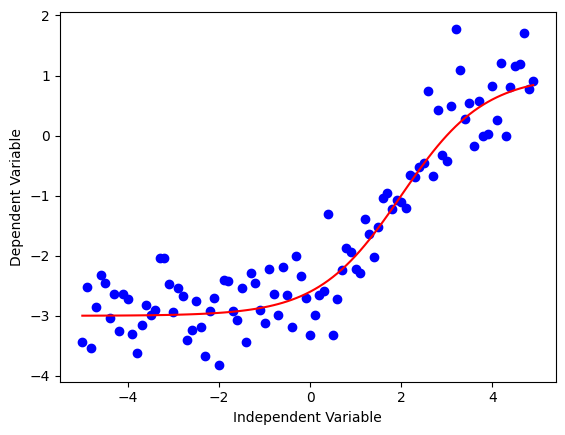

In [7]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))
y_noise = 0.5*np.random.normal(size=X.size)
y_data = Y + y_noise
plt.plot(X,y_data,'bo')
plt.plot(X,Y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#Functions

##Linear Regression

In [8]:
class LinearRegression :
  def __init__ ( self , X_data , y_target , minibatch_size =20, learning_rate =0.001 , num_epochs =10000) :
    self.X_data = np.array(X_data)
    self.y_target = np.array(y_target)
    self.batch_size = minibatch_size
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.num_samples = self.X_data.shape[0]
    self.theta = np.random.randn(self.X_data.shape[1],1)
    self.thetas_path = [self.theta]
    self.losses = []
  def compute_loss (self, y_pred , y_target ) :
    loss = 1/2*(y_pred - y_target)*(y_pred - y_target)
    loss = np.mean(loss)
    return loss
  def predict (self, X_data ):
    y_pred = X_data.dot (self.theta)
    return y_pred
  def fit ( self ) :
    for epoch in range(self.num_epochs) :
      self.shuffled_indices = np. random.permutation (self.num_samples)
      self.X_b_shuffled = self.X_data[self.shuffled_indices]
      self.y_shuffled = self.y_target[self.shuffled_indices]
      for i in range (0 , self.num_samples , self.batch_size):
        self.xi = self.X_b_shuffled[ i : i + self.batch_size]
        self.yi = self.y_shuffled[ i: i + self.batch_size]
        yi_hat = self.predict(self.xi)
        loss = self.compute_loss (yi_hat, self.yi)
        self.losses.append(loss)
        print (f'Epoch : { epoch } - Loss : {loss}')
        gradients = self.xi.T.dot(yi_hat - self.yi)/self.batch_size
        self.theta = self.theta - self.learning_rate*(gradients)
        self.thetas_path.append (self.theta)
    return self.thetas_path, self.losses
  def best_parameter(self) :
    self.best_loss = min(self.losses)
    self.index_best_loss = self.losses.index(self.best_loss)
    self.best_theta = self.thetas_path[self.index_best_loss]
    print(f'number of losses: {len(self.losses)}')
    print(f'best loss is {self.best_loss} with index is {self.index_best_loss} and best theta is {self.best_theta}')
    return self.best_loss, self.best_theta
  def plot_losses(self):
    plt.plot(self.losses, color ="r")
    plt.plot(self.index_best_loss,self.best_loss,'bo', markersize=2, label='best loss')
    plt.show()

##Polynomial Features
The trend of data is not really linear: Linear Regression => Polynomial Regression

Linear Regression: $f(x) = \theta x + b$

Polynomial Regression: $f(x) = \theta x + \theta x^2 + b$.

When we replace the  $x$ with $x_1$, $x^2$ with $x_2$, we have $f(x) = \theta_1 x_1 + \theta_2 x_2 + b$. We can deal with it as a Linear Regression.

New features: (ex: from 3 original features $x_1, x_2, x_3$ we will have 7 new features)
- The bias b (the value of 1.0)
- Values raised to a power for each degree $(x_1)^2, (x_2)^2, (x_3)^2$
- Interactions between all pairs of features $x_1x_2, x_1x_3, x_2x_3$

In [9]:
def create_polynomial_features (X , degree =2) :
  X = np.array(X)
  from itertools import combinations
  features_no = X.shape[1]
  bias = np.ones(len(X),)
  X_mem = []

  if features_no == 1:
    X_mem = np.concatenate((X, pow(X,degree)), axis=1)

  else:
    for i in range(features_no):
      X_mem.append(X[:,i]**degree)
    for com_ in combinations(np.arange(features_no).tolist(), 2):
      X_mem.append(X[:,com_[0]]*X[:,com_[1]])
      X_mem = np.c_[X_mem].T
  return np.c_[bias,X_mem]

##The coefficient of determination ($R^2$)
$R^2 = 1 - \dfrac{RSS}{TSS} = 1 - \dfrac{\qquad \sum_{i}^N (y_i -\hat{y}_i)^2}{\qquad \sum_{i}^N (y_i -\bar{y}_i}$

RSS (Total sum squared residuals):$\qquad \sum_{i}^N (y_i -\hat{y}_i)^2$

TSS (Total sum of squared):$\qquad \sum_{i}^N (y_i -\bar{y}_i)^2$

In [10]:
def r2score ( y_pred , y ) :
  rss = np.sum ((y_pred-y)*(y_pred-y))
  tss = np.sum ((y-y.mean())*(y-y.mean()))
  r2 = 1 - (rss/tss)
  return r2

##Convert categories to numbers


In [11]:
# One Hot Encoding
def onehot_encode(X):
  return pd.get_dummies(X)
# Label Encoding
def label_encode(X):
  return X.astype('category').cat.codes

##Understanding the Data

In [12]:
def plot_features(trainset, testset=None, spc_feature = None):
  import matplotlib.pyplot as plt
  features = trainset.describe().columns.to_list()
  if testset is None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature is None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1
  elif testset is not None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature == None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          plt.hist(testset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.scatter(testset[i], testset[spc_feature],  color='red')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1

#Results

##dataset: FuelConsumptionCo2.csv

In [13]:
files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


{'FuelConsumptionCo2.csv': b'MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS\r2014,ACURA,ILX,COMPACT,2,4,AS5,Z,9.9,6.7,8.5,33,196\r2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221\r2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9,48,136\r2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255\r2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244\r2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10,28,230\r2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232\r2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9,11.1,25,255\r2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267\r2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212\r2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225\r2014,ACURA,TSX,COMPACT,3.5,6,AS5,Z,12.1,8.3,10.4,27,239\r2014,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18,12.6,15.6,18,359\r2014,ASTON MARTIN,RAPIDE,SUB

In [14]:
#Read data
data = pd.read_csv('FuelConsumptionCo2.csv') #source: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
data = data.drop('MODELYEAR', axis=1)
data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
#Convert categories to numbers
data['MAKE'] = label_encode(data['MAKE'])
data['MODEL'] = label_encode(data['MODEL'])
data['VEHICLECLASS'] = label_encode(data['VEHICLECLASS'])
data['TRANSMISSION'] = label_encode(data['TRANSMISSION'])
data['FUELTYPE'] = label_encode(data['FUELTYPE'])
data

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,38,624,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1063,38,624,11,3.2,6,11,2,13.2,9.5,11.5,25,264
1064,38,625,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1065,38,625,11,3.2,6,11,2,12.9,9.3,11.3,25,260


In [17]:
data.describe()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,17.223055,331.014995,6.337395,3.346298,5.794752,9.670103,2.269916,13.296532,9.474602,11.580881,26.441425,256.228679
std,10.937264,188.664368,5.095388,1.415895,1.797447,6.673143,0.722374,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,7.000000,173.000000,2.000000,2.000000,4.000000,2.000000,2.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,15.000000,324.000000,6.000000,3.400000,6.000000,11.000000,2.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,26.000000,502.500000,11.000000,4.300000,8.000000,13.000000,3.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,38.000000,662.000000,15.000000,8.400000,12.000000,21.000000,3.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [18]:
#find the pairwise correlation of all columns
data.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MAKE,1.00,0.04,0.01,-0.17,-0.20,0.19,0.02,-0.25,-0.17,-0.22,0.23,-0.19
MODEL,0.04,1.00,0.24,0.10,0.08,-0.00,-0.05,0.15,0.18,0.16,-0.15,0.16
VEHICLECLASS,0.01,0.24,1.00,0.24,0.21,-0.17,-0.08,0.35,0.43,0.38,-0.35,0.39
ENGINESIZE,-0.17,0.10,0.24,1.00,0.93,-0.27,0.06,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,-0.20,0.08,0.21,0.93,1.00,-0.25,0.13,0.80,0.72,0.78,-0.77,0.85
TRANSMISSION,0.19,-0.00,-0.17,-0.27,-0.25,1.00,0.21,-0.35,-0.35,-0.35,0.34,-0.30
FUELTYPE,0.02,-0.05,-0.08,0.06,0.13,0.21,1.00,-0.13,-0.18,-0.15,0.01,0.08
FUELCONSUMPTION_CITY,-0.25,0.15,0.35,0.83,0.80,-0.35,-0.13,1.00,0.97,1.00,-0.94,0.90
FUELCONSUMPTION_HWY,-0.17,0.18,0.43,0.78,0.72,-0.35,-0.18,0.97,1.00,0.99,-0.89,0.86
FUELCONSUMPTION_COMB,-0.22,0.16,0.38,0.82,0.78,-0.35,-0.15,1.00,0.99,1.00,-0.93,0.89


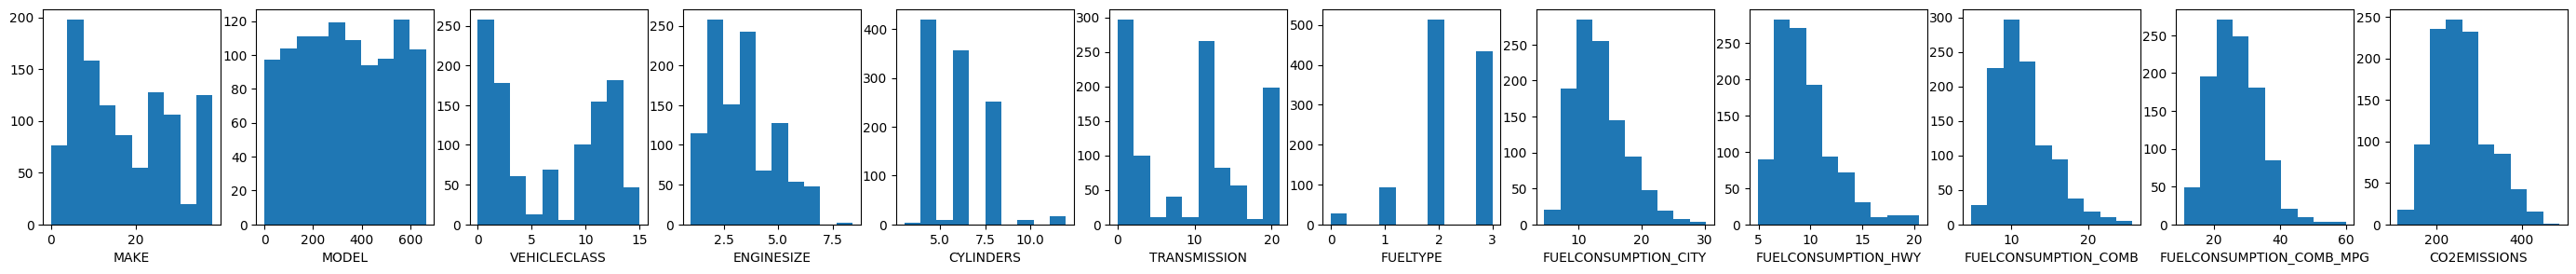

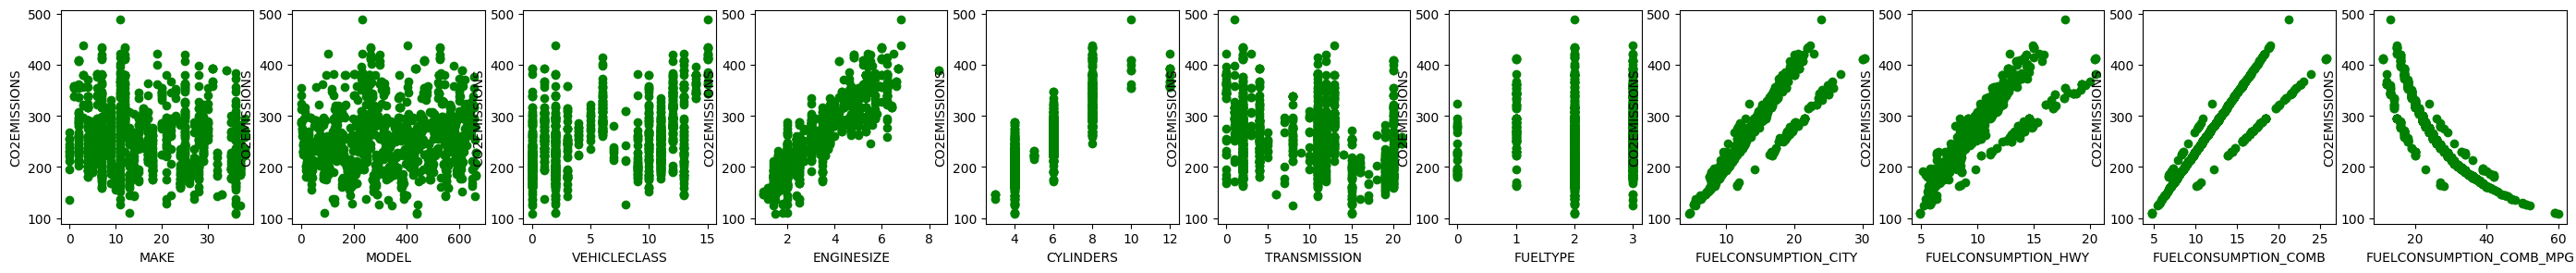

In [19]:
plot_features(data)
plot_features(data, spc_feature = 'CO2EMISSIONS')

In [20]:
#Creating train and test dataset
msk = np.random.rand(len(data)) < 0.8
data_train = data[msk]
data_test = data[~msk]

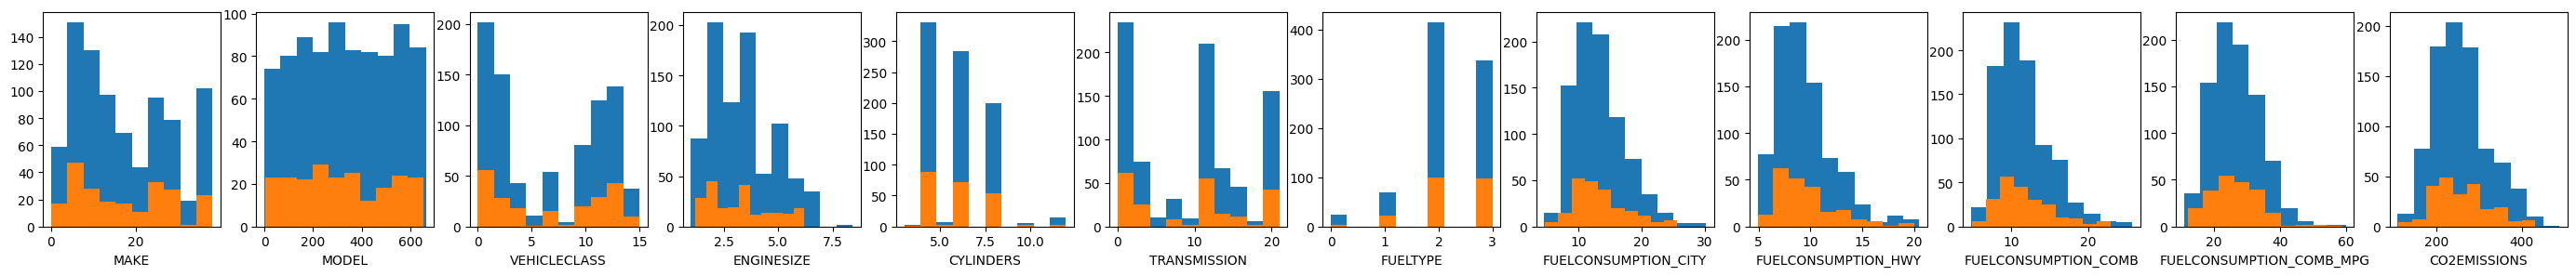

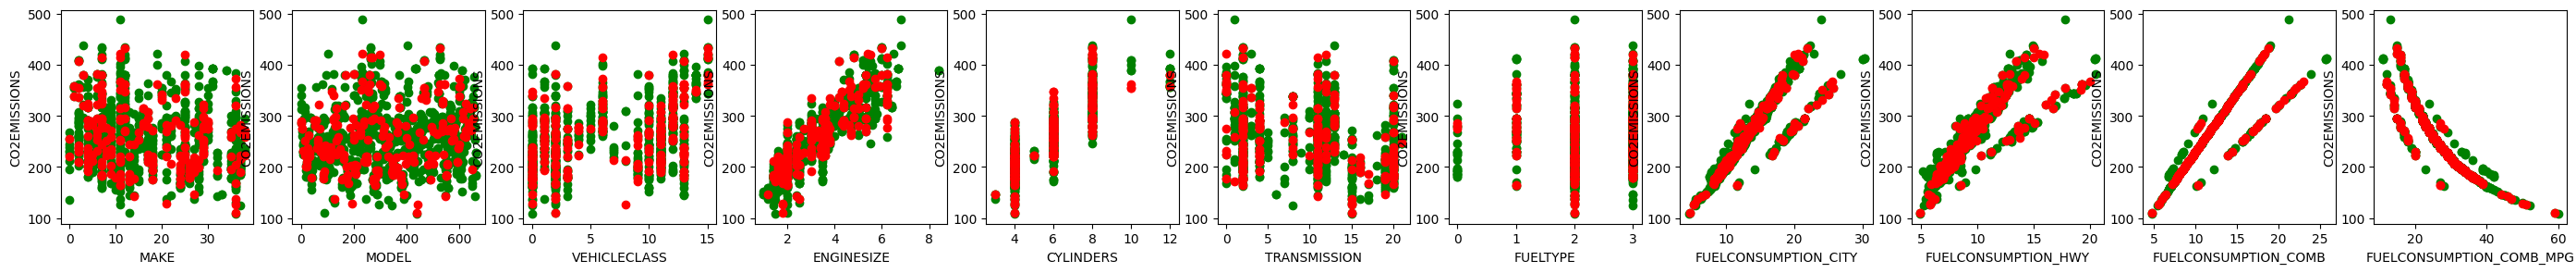

In [21]:
plot_features(data_train, data_test)
plot_features(data_train, data_test ,spc_feature = 'CO2EMISSIONS')

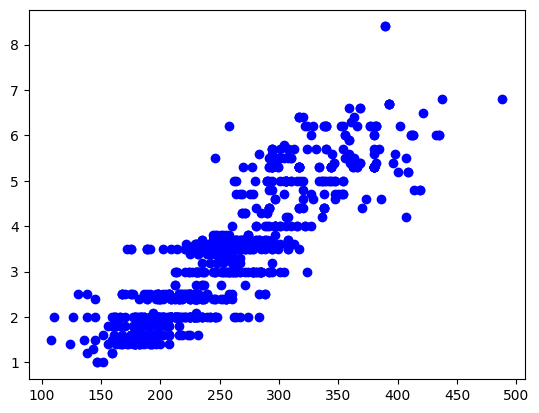

In [22]:
#Plot the curve
X_train = data_train[['ENGINESIZE']]
Y_train = data_train[['CO2EMISSIONS']]
X_test = data_test[['ENGINESIZE']]
Y_test = data_test[['CO2EMISSIONS']]
plt.scatter(Y_train, X_train , c ="blue")

###Linear Regression: $f(x) = \theta x + b$

Streaming output truncated to the last 5000 lines.
Epoch : 9814 - Loss : 347.3469858125462
Epoch : 9814 - Loss : 575.659245812587
Epoch : 9815 - Loss : 374.7508117351035
Epoch : 9815 - Loss : 387.584671007626
Epoch : 9815 - Loss : 545.3739808516289
Epoch : 9815 - Loss : 451.52811864615546
Epoch : 9815 - Loss : 332.6632978371199
Epoch : 9815 - Loss : 305.16401320141426
Epoch : 9815 - Loss : 334.72408893176384
Epoch : 9815 - Loss : 390.37210091261943
Epoch : 9815 - Loss : 528.6921756579334
Epoch : 9815 - Loss : 441.7316370593643
Epoch : 9815 - Loss : 719.784175245478
Epoch : 9815 - Loss : 552.6824551532
Epoch : 9815 - Loss : 457.3634777250406
Epoch : 9815 - Loss : 777.3862542105069
Epoch : 9815 - Loss : 515.9563323104808
Epoch : 9815 - Loss : 592.7464609188851
Epoch : 9815 - Loss : 218.8836966947666
Epoch : 9815 - Loss : 633.9566694241693
Epoch : 9815 - Loss : 401.96780432907707
Epoch : 9815 - Loss : 405.07258787350156
Epoch : 9815 - Loss : 332.323619773054
Epoch : 9815 - Loss : 485.0981

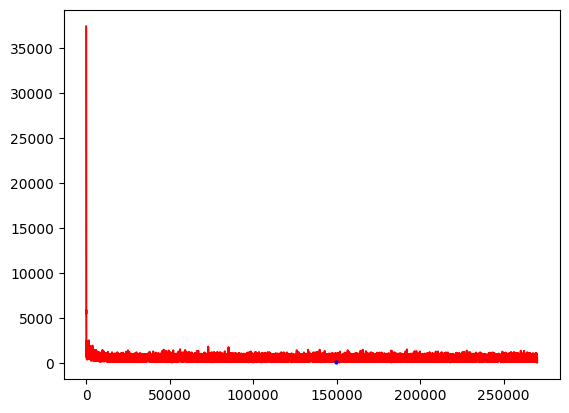

In [23]:
#Training
X_train_ = np.c_[np.ones(len(X_train),),X_train]
model = LinearRegression(X_train_, Y_train, learning_rate =0.001 ,minibatch_size =32, num_epochs =10000)
model.fit()
best_loss, best_theta = model.best_parameter()
model.plot_losses()

Text(0, 0.5, 'Emission')

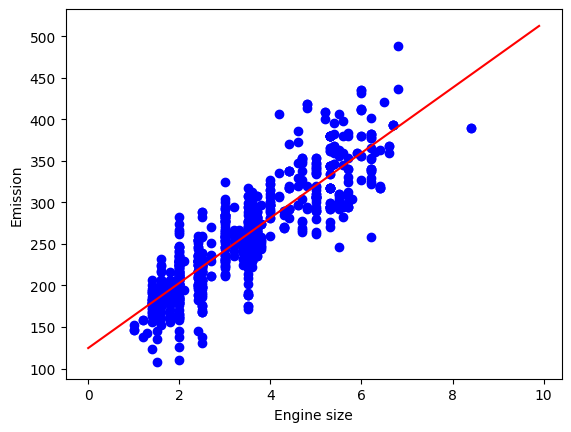

In [24]:
#Plot the curve
plt.scatter(X_train, Y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = best_theta[0][0] + (best_theta[1][0]*XX)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [27]:
#Testing
X_test_ = np.c_[np.ones(len(X_test),),X_test]
y_pred = X_test_.dot(best_theta)

#Evaluation
print("R2-score: %.2f" % r2score(y_pred, Y_test))

R2-score: 0.73


###Polynomial Regression: $f(x) = \theta x + \theta x^2 + b$.

Streaming output truncated to the last 5000 lines.
Epoch : 9814 - Loss : 308.938838826651
Epoch : 9815 - Loss : 467.2486560203506
Epoch : 9815 - Loss : 402.1484548799576
Epoch : 9815 - Loss : 438.46090286742003
Epoch : 9815 - Loss : 657.30587978795
Epoch : 9815 - Loss : 251.31206394115395
Epoch : 9815 - Loss : 301.5446824037533
Epoch : 9815 - Loss : 333.9755259954029
Epoch : 9815 - Loss : 467.53869174968656
Epoch : 9815 - Loss : 593.855219911114
Epoch : 9815 - Loss : 652.446481565985
Epoch : 9815 - Loss : 331.059884195928
Epoch : 9815 - Loss : 441.9268517953779
Epoch : 9815 - Loss : 453.2856927904673
Epoch : 9815 - Loss : 302.0362603425717
Epoch : 9815 - Loss : 400.1445319117607
Epoch : 9815 - Loss : 619.2617171345319
Epoch : 9815 - Loss : 189.77175670306997
Epoch : 9815 - Loss : 452.1934571495008
Epoch : 9815 - Loss : 675.23598356902
Epoch : 9815 - Loss : 300.3918305396555
Epoch : 9815 - Loss : 466.72529407117213
Epoch : 9815 - Loss : 587.5117029279434
Epoch : 9815 - Loss : 586.284402

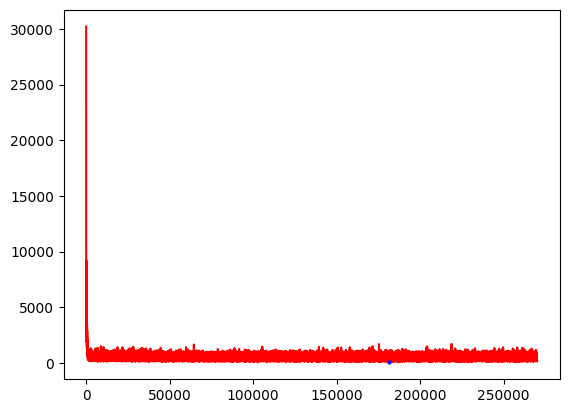

In [28]:
#Training
polynomial_features = create_polynomial_features (X_train, degree =2)
model = LinearRegression(polynomial_features, Y_train, learning_rate =0.001 ,minibatch_size =32, num_epochs =10000)
model.fit()
best_loss, best_theta = model.best_parameter()
model.plot_losses()

Text(0, 0.5, 'Emission')

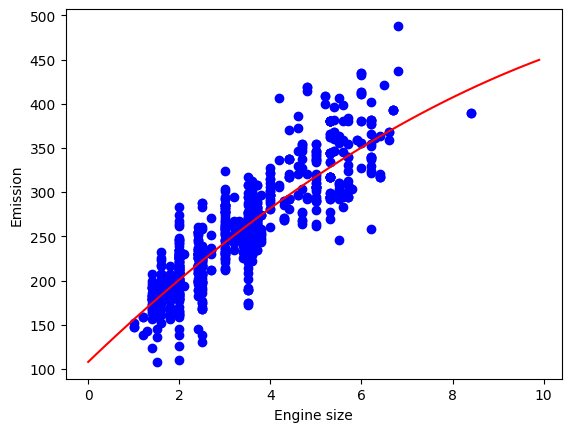

In [29]:
#Plot the curve
plt.scatter(X_train, Y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = best_theta[0][0] + (best_theta[1][0]*XX) + (best_theta[2][0]*np.power(XX, 2))
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [30]:
#Testing
X_test_ = create_polynomial_features(X_test, degree =2)
y_pred = X_test_.dot(best_theta)

#Evaluation
print("R2-score: %.2f" % r2score(y_pred, Y_test))

R2-score: 0.73


###Polynomial Regression using Sklearn

####Degree=2

Coefficients:  [[ 0.         48.56988019 -1.24915298]]
Intercept:  [109.63884457]
R2-score train: 0.77


Text(0, 0.5, 'Emission')

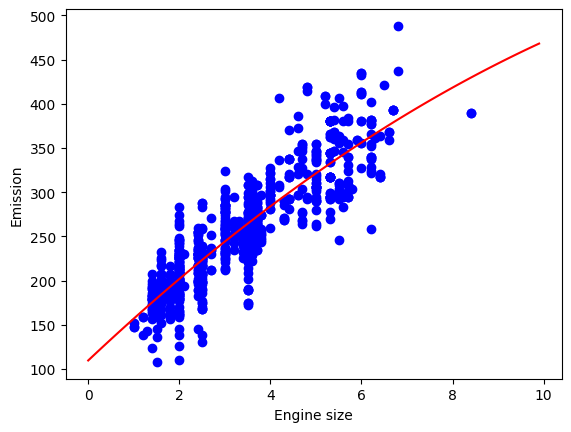

In [31]:
#Run polynomial features => create new features
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
poly2 = PolynomialFeatures(degree=2)
train_x_poly2 = poly2.fit_transform(X_train) #convert x from x to x^2 <=> x_new = x^2

#Run Linear regression to solve it
clf2 = linear_model.LinearRegression()
train_y_2 = clf2.fit(train_x_poly2, Y_train)

# The coefficients
print ('Coefficients: ', clf2.coef_)
print ('Intercept: ',clf2.intercept_)

train_y_2 = clf2.predict(train_x_poly2)
print("R2-score train: %.2f" % r2_score(Y_train,train_y_2 ) )

#Plot the curve
plt.scatter(X_train, Y_train,  color='blue')
XX2 = np.arange(0.0, 10.0, 0.1)
yy2 = clf2.intercept_+ clf2.coef_[0,1]*XX2 + clf2.coef_[0,2]*np.power(XX2, 2)
plt.plot(XX2, yy2, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [32]:
#Evaluation
test_x_poly2 = poly2.fit_transform(X_test)
test_y_2 = clf2.predict(test_x_poly2)
print("Mean absolute error: %.2f" % (np.absolute(test_y_2 - Y_test)).mean())
print("Residual sum of squares (MSE): %.2f" % ((test_y_2 - Y_test) ** 2).mean())
print("R2-score test: %.2f" % r2_score(Y_test,test_y_2 ) )

Mean absolute error: 24.40
Residual sum of squares (MSE): 1065.91
R2-score test: 0.74


####degree = 4

Coefficients:  [[  0.          75.69675598 -14.56490012   2.55813197  -0.16594353]]
Intercept:  [91.60776827]
R2-score train: 0.78


Text(0, 0.5, 'Emission')

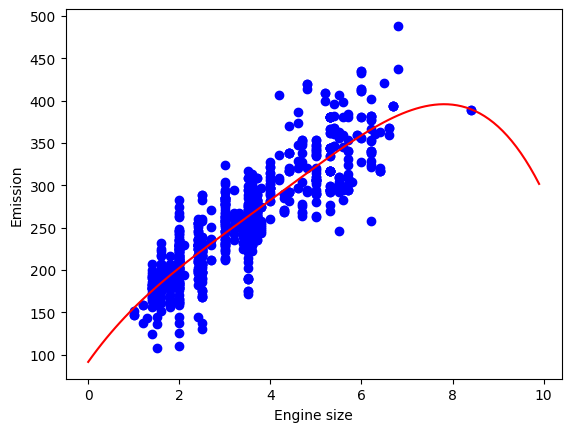

In [33]:
poly4 = PolynomialFeatures(degree=4)
train_x_poly4 = poly4.fit_transform(X_train)

clf4 = linear_model.LinearRegression()
train_y_4 = clf4.fit(train_x_poly4, Y_train)

print ('Coefficients: ', clf4.coef_)
print ('Intercept: ',clf4.intercept_)

train_y_4 = clf4.predict(train_x_poly4)
print("R2-score train: %.2f" % r2_score(Y_train,train_y_4) )

plt.scatter(X_train, Y_train,  color='blue')
XX4 = np.arange(0.0, 10.0, 0.1)
yy4 = clf4.intercept_+ clf4.coef_[0,1]*XX4 + clf4.coef_[0,2]*np.power(XX4, 2) + clf4.coef_[0,3]*np.power(XX4, 3) + clf4.coef_[0,4]*np.power(XX4, 4)
plt.plot(XX4, yy4, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [34]:
#Evaluation
test_x_poly4 = poly4.fit_transform(X_test)
test_y_4 = clf4.predict(test_x_poly4)
print("Mean absolute error: %.2f" % (np.absolute(test_y_4 - Y_test)).mean())
print("Residual sum of squares (MSE): %.2f" % ((test_y_4-  Y_test) ** 2).mean())
print("R2-score test: %.2f" % r2_score( Y_test,test_y_4 ) )
#The result doesnt in better accuracy, same accuracy

Mean absolute error: 24.43
Residual sum of squares (MSE): 1071.22
R2-score test: 0.74


##dataset: china_gdp.csv

In [35]:
files.upload()

Saving china_gdp.csv to china_gdp.csv


{'china_gdp.csv': b'Year,Value\n1960,59184116488.9977\n1961,49557050182.9631\n1962,46685178504.3274\n1963,50097303271.0232\n1964,59062254890.1871\n1965,69709153115.3147\n1966,75879434776.1831\n1967,72057028559.6741\n1968,69993497892.3132\n1969,78718820477.9257\n1970,91506211306.3745\n1971,98562023844.1813\n1972,112159813640.376\n1973,136769878359.668\n1974,142254742077.706\n1975,161162492226.686\n1976,151627687364.405\n1977,172349014326.931\n1978,148382111520.192\n1979,176856525405.729\n1980,189649992463.987\n1981,194369049090.197\n1982,203549627211.606\n1983,228950200773.115\n1984,258082147252.256\n1985,307479585852.339\n1986,298805792971.544\n1987,271349773463.863\n1988,310722213686.031\n1989,345957485871.286\n1990,358973230048.399\n1991,381454703832.753\n1992,424934065934.066\n1993,442874596387.119\n1994,562261129868.774\n1995,732032045217.766\n1996,860844098049.121\n1997,958159424835.34\n1998,1025276902078.73\n1999,1089447108705.89\n2000,1205260678391.96\n2001,1332234719889.82\n200

In [36]:
data = pd.read_csv('china_gdp.csv') #source: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [37]:
data.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [38]:
data.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,Year,Value
Year,1.00,0.72
Value,0.72,1.00


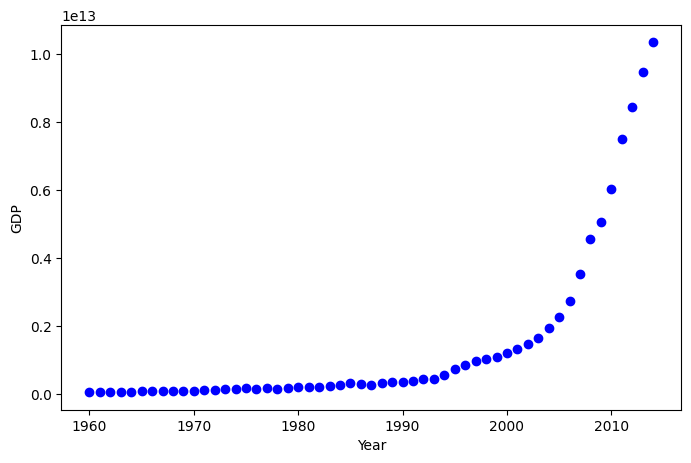

In [39]:
plt.figure(figsize=(8,5))
X, Y = (data["Year"].values, data["Value"].values)
plt.plot(X, Y, 'bo')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

A logistic function ($f(x)=\frac{1}{1+e^{-x}}$) can be used to perform a good approximation for the trend of year and population.

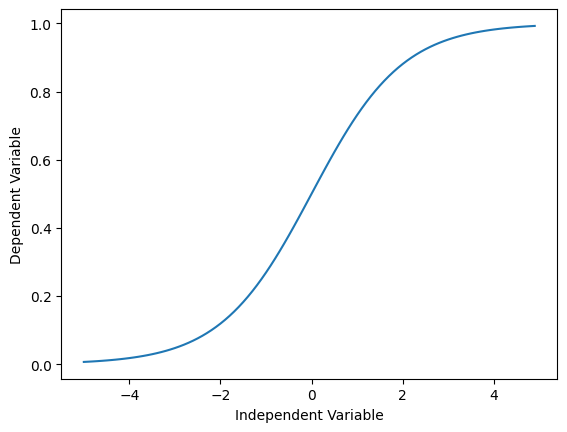

In [40]:
X_ = np.arange(-5.0, 5.0, 0.1)
Y_ = 1.0 / (1.0 + np.exp(-X_))
plt.plot(X_,Y_)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [41]:
# Lets normalize our data
xdata =X/max(X)
ydata =Y/max(Y)
print(xdata.shape, ydata.shape)

#Creating train and test dataset
msk = np.random.rand(len(data)) < 0.8
X_train = xdata[msk]
Y_train = ydata[msk]
print(X_train.shape, Y_train.shape)
X_test = xdata[~msk]
Y_test = ydata[~msk]
print(X_test.shape, Y_test.shape)

(55,) (55,)
(46,) (46,)
(9,) (9,)


###Logistic Function: $f(x) = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$
$\beta\_1$: Controls the curve's steepness, $\beta\_2$: Slides the curve on the x-axis.

In [42]:
from scipy.optimize import curve_fit
def sigmoid(x, Beta_1, Beta_2):
    return 1 / (1 + np.exp(Beta_1*(x-Beta_2)))

#Best parameters
popt, pcov = curve_fit(sigmoid, X_train, Y_train)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = -768.760234, beta_2 = 0.997266


R2-score train: 0.98


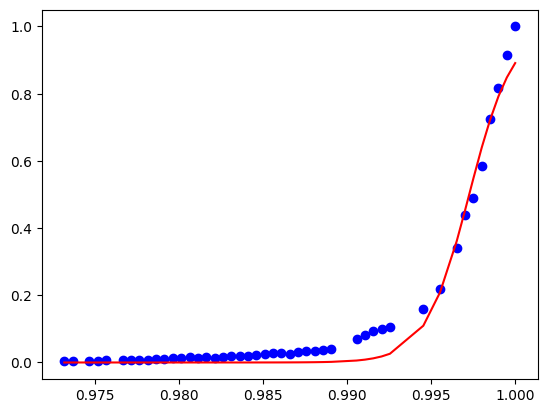

In [43]:
#Prediction on training set
y_pred = sigmoid(X_train, popt[0], popt[1])

#Evaluation
print("R2-score train: %.2f" % r2score(y_pred, Y_train))

#Plot on training set and curved graph
plt.plot(X_train, Y_train, 'bo', label='data')
plt.plot(X_train, y_pred, 'r', label='data')

R2-score test: 0.64


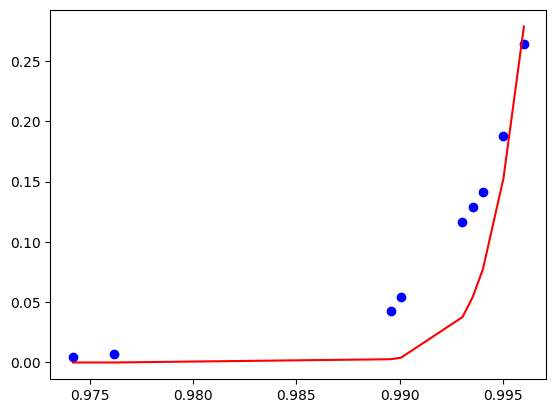

In [44]:
#Prediction on testing set
y_pred_ = sigmoid(X_test, popt[0], popt[1])

#Evaluation
print("R2-score test: %.2f" % r2score(y_pred_, Y_test))

#Plot on testing set and curved graph
plt.plot(X_test, Y_test, 'bo', label='data')
plt.plot(X_test, y_pred_, 'r', label='data')